# PAMD computer lab week 4 - Logistic regression + Lasso regression

This week's lab will be focused on how to implement logistic regression models, how to evaluate them using confusion matrices and ROC scores, and how lasso regression can be used to choose the most important variables.

Our dataset today will be the breast_cancer datafrom skicit learn.

First, have a look at the dataset documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) to explain what the data will look like.

In [116]:
import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import numpy as np

# Let's load in the data and organise it as predictors (X) and to-be-predicted target class (Y).
dataset_class = ds.load_breast_cancer()
X_class = pd.DataFrame(data = dataset_class['data'], columns = dataset_class['feature_names'])
y_class = pd.DataFrame(data = dataset_class['target'], columns = ['target'])

print(dataset_class.DESCR) #This calls the general description of the data, including number of observations, 
# source, and some descriptive statistics.

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [117]:
print(X_class.columns) #This calls the names of the features.

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [118]:
print(y_class.head())

   target
0       0
1       0
2       0
3       0
4       0


## Task 1: Implement simple logistic regression

Start just like we did last week with a simple regression model with just one X variable. I recommend that you use the scikit learn function LogisticRegression() for that. Have a look at the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) as that will help you get started. I typically first have a look at the parameters that the function takes, and then have a look at the implementation example. I then try to replicate that example with my data.

As we first want to implement just a simple logistic regression, pick one independent variable as your predictor. You can choose any one of the available ones.

One important parameter will be the **solver**. You will remember that we are looking for the best-fit parameters to fit our model to the data. The solver is the approach that the algorithm uses to achieve that. In this example, I would recommend using the 'liblinear' solver. It works best for smaller datasets, which we have here with just around 570 observations.

Then the process is very similar to that of implementing the linear regression last week. Try it out yourself below.

- Implement a simple logistic regression using the scikit learn function
- Choose any independent variable as your X
- use the 'liblinear' solver
- save your predictions in a separate array for later evaluation

Tip: You will notice that the fit() function wants your Y to be an array, but you currently have it as a dataframe column. You can use the [numpy reshape() function](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) to change the format of it with y_class.values.reshape(-1,)

In [119]:
from sklearn.linear_model import LogisticRegression

X_class = X_class["mean radius"]
X_class = X_class.values.reshape(-1, 1)
y_class = y_class.values.reshape(-1)
print(y_class.shape)

logModel = LogisticRegression(solver="liblinear")

logModel.fit(X_class, y_class)

predictions = logModel.predict(X_class)

print(predictions)

(569,)
[0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 0 1 0

### 1.2 Logistic regression evaluation and confusion matrices

We now want to evaluate our results. Plotting isn't easy in this case, as we're only predicting a class. Instead, what we usually do, is **count** the number of correct predictions.

I will do that using a for-loop, where I simply check whether the predicted value (which I saved in an array from my model above) is the same as the y_class.value at that i. You can use any other approach which feels better for you. Just try to count the number of correctly classified elements (where prediction==actual).

In [120]:
correctCount = 0
for i in range(len(predictions)):
    if predictions[i] == y_class[i]:
        correctCount += 1

print(correctCount)
print(correctCount / len(predictions))

504
0.8857644991212654


But what does that number of correct elements actually tell us? It can be a good enough measure depending on what you want to know.

**BUT!**

From the lecture you will remember that sometimes we don't only care about which elements we correctly predicted, but the errors we made.

There are four cases that you might get:

- Label is TRUE and you predict TRUE -> True Positive (TP)
- Label is FALSE and you predict FALSE -> True Negative (TN)
- Label is TRUE and you predict FALSE -> False Negative (FN)
- Label is FALSE and you predict TRUE -> False Positive (FP)

You will remember that depending on your application context, false positive and false negatives can be worse. Think about our breastcancer dataset here. What do you think would be the worst outcome?

A simple way for extracting the different cases above is using the scikit learn function confusion_matrix(). Try using that function below, you just have to input arrays with your prediction and the real values y_class.values, just like we did above.

In [121]:
from sklearn.metrics import confusion_matrix

conMatrix = confusion_matrix(y_class, predictions)

print(conMatrix)

# ADD YOUR CODE HERE

[[158  54]
 [ 11 346]]


If you check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) you will see that we can also extract the TP,TN,FN and FP values as an array using the ravel() function.

### 1.3 Other evaluation metrics (accuracy, recall, precision, specificity)

Some other measures of model evaluation related to TP,TN,FN and FP are 

- accuracy (TP+TN)/(TP+FP+FN+TN)
- recall (TP)/(TP+FN) 
- precision (TP)/(TP+FP) 
- specificity (TN)/(TN+FP) 

They can all be calculated using the values acquired above. I will demonstrate that below.

In [122]:
# Get values from our confusion_matrix function using ravel()

TP, FP, FN, TN = confusion_matrix(predictions, y_class).ravel()


def calculate_accuracy(TP, FP, FN, TN):
    acc = 0
    acc = (TP + TN) / (TP + FP + FN + TN)
    return acc


def calculate_recall(TP, FP, FN, TN):
    recall = 0
    recall = (TP) / (TP + FN)
    return recall


def calculate_specificity(TP, FP, FN, TN):
    spec = 0
    spec = (TN) / (TN + FP)
    return spec


def calculate_precision(TP, FP, FN, TN):
    prec = 0
    prec = (TP) / (TP + FP)
    return prec


print("Accuracy " + str(calculate_accuracy(TP, FP, FN, TN)))
print("Recall " + str(calculate_recall(TP, FP, FN, TN)))
print("Precision " + str(calculate_precision(TP, FP, FN, TN)))
print("Specificity " + str(calculate_specificity(TP, FP, FN, TN)))

Accuracy 0.8857644991212654
Recall 0.7452830188679245
Precision 0.9349112426035503
Specificity 0.969187675070028


Other measures you could read about in addition to the above if you're curious are fall-out and the f1-score.

### 1.4 ROC curve

An important visualisation and evaluation tool for classification models is the "receiver operating characteristic curve" or **ROC curve**.

It plots the True Positive and False Positive rates, and we often calculate the area under the curve (AUC) as a measure of model fit.

As usual, scikit learn provides us with an easy to use way of implementing both a plot of the ROC and the calculation of the AUC. Using the two functions, for which you can read the documentation [here for ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) and [here for AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html), try plotting a ROC curve for our classification above and calculate the area under the curve AUC.

Tip: If you're a bit stuck, have a look at the AUC documentation above in particular. The implementation example is easy to follow and you can use that as your guide for the creation of the ROC element and the calculation of the AUC. Then you just have to plot the TPR (y-axis) and FPR (x-axis).

In [123]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve as roc

158 11 54 346
[[0.82823148 0.17176852]
 [0.95137969 0.04862031]
 [0.92386828 0.07613172]
 ...
 [0.69391566 0.30608434]
 [0.95212757 0.04787243]
 [0.01832669 0.98167331]]


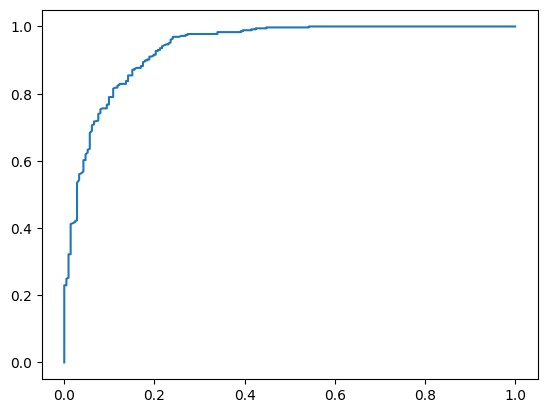

In [124]:
print(TP, FP, FN, TN)
y_scores = logModel.predict_proba(X_class)
print(y_scores)

rocValues = roc(y_class, y_scores[:, 1])
falsePositiveRate, truePositiveRate = rocValues[0], rocValues[1]
plt.plot(falsePositiveRate, truePositiveRate)

## Optional: Additional tasks

If you would like to continue this example, try implementing a multiple logistic regression next. Does your model improve its prediction accuracy? Compare the error rates or the AUC values. You can also try plotting the two ROCs from the simple and the multiple model together to visualise the improvement.

If you'd rather move on to the next example, have a look at the below.

## Demonstration: Logistic regression with Lasso

The last thing I wanted to introduce today is how you can use Lasso to improve a logistic regression model by choosing the best combination of predictors. I will demonstrate this using a multi-class logistic regression example, to make it a bit more interesting, but the same logic can be applied to our binary example from above.

Specifically, we will come back to our old friend the [Wine data set](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset):

This dataset consists of 178 instances and 13 variables, describing different wines and their characteristics. The dataset also gives us three classes

class_0
class_1
class_2

which we want to predict.

The class distribution is relatively evenly spread:

class_0 (59), class_1 (71), class_2 (48)

Remember that in some instances, when you're trying to predict particularly rare classes, you might need to do some pre-processing of the data (e.g. through oversampling). Otherwise, you run into the risk of the predictive model not being able to fit properly to those classes.

In [125]:
# We start by importing today's packages

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts


# Load the dataset and specify which part will be the predictors and which the to-be-predicted outcome
dataset = ds.load_wine()
X = dataset['data']
y = dataset['target']

# Split data, here 70/30 split
x_train, x_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42)

Remember that logistic regression (just like linear regression last week) is sensitive towards scale differences. We therefore scale our predictors. Output variables don't usually need scaling, as we are not making direct comparisons among them.

In [126]:
# Scaled predictors
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)

In [127]:
# Fit everything together nicely into one dataframe after scaling in the previous step.

data1 = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                     columns= dataset['feature_names'] + ['target'])                     

data1.describe()

# Note that the descriptives don't actually tell us anything about our target variable, because it's a label.
# You can see, however, that there doesn't seem to be any missing data (all counts 178) and you can also
# use these statistics to get an idea of the distribution of your predictors.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


We now want to fit a logistic regression model to predict the membership in a group.

In this case, we choose a penalized regression model. You will remember that these models allow us to reduce the number of predictors (in this case 13 of them) to only contain the most informative ones.

For Lasso regression, the choice of the penalty factor is quite important. Thinking back to the lecture slides, this is your tuning parameter lambda. It describes how much you want to penalize for any added parameter.

- A lambda of 0 implies that all predictors should be kept and no penalty should be applied.
- A lambda of infinity would consider no predictors at all and a maximum penalty. Usually, we restrict the parameter to max out at 1 though.
- With an increasing lambda, we consider fewer predictors. This increases the bias of the model. High bias is related to underfitting your model.
- With a decreasing lambda, we consider more predictors. This increases the variance of the model. High variance is related to overfitting.

In order to choose an optimal lambda for our case, we run k-fold cross validation to tune it while accounting for the model accuracy.

In [128]:
from numpy import arange
from sklearn.model_selection import GridSearchCV

lasso_logistic_model = LogisticRegression(
    penalty='l1', # L1 penalty refers to Lasso regression (L2 would be ridge regression and 'elasticnet' elastic net)
    solver='liblinear') # we choose this solver here because it's the fastest for small datasets


# Let's now look for the optimal value of lambda:

grid = dict() 
grid['C'] = arange(0.0001, 1, 0.01)

# 5-fold cross validation, evaluating by model accuracy
search = GridSearchCV(lasso_logistic_model, grid, scoring='accuracy', cv=5, refit=True)
results = search.fit(x_train_scaled, y_train)

print('Config: %s' % results.best_params_)


Config: {'C': 0.4901}


We have identified our optimal lambda in this case to be 0.4901.

But what is the actual impact of this penalization term on the results of our logistic regression?


Let's visualize the coefficients of the lasso-logistic model and compare with those of the standard (non-penalized) model

In [129]:
# Coefficients of the lasso-logistic model
lasso_model = LogisticRegression(
    penalty='l1', # Lasso regression
    solver='liblinear',
    C = 0.4901).fit(x_train_scaled,y_train) #here is your new penalty term from before
print("Coefficients of the lasso logistic model: \n\n",lasso_model.coef_)

# Coefficients of the traditional logistic model
logistic_model = LogisticRegression( # use the same model
    penalty='none').fit(x_train_scaled,y_train) # but without the penalty
print("\n\n Coefficients of the traditional logistic model: \n\n",logistic_model.coef_)

Coefficients of the lasso logistic model: 

 [[ 1.03441761  0.          0.56456559 -1.0412312   0.          0.
   0.93411253  0.          0.          0.          0.          0.46108538
   1.64088557]
 [-1.41022274 -0.08099093 -0.80037343  0.46466053  0.          0.
   0.15680854  0.          0.29090555 -1.29697742  1.05495477  0.
  -1.41953695]
 [ 0.          0.17317128  0.1556954   0.          0.          0.
  -1.55778317  0.          0.          1.29754735 -0.79328054 -0.64346563
   0.        ]]


 Coefficients of the traditional logistic model: 

 [[ 4.07894388  1.40496807  2.6084901  -4.70856028  0.65505705  1.16054494
   2.13844972  0.65351972  1.11618752  0.3218668  -0.1976088   3.00237699
   4.26715433]
 [-6.59464113 -0.8653589  -5.73187583  4.49811726  0.26276841 -2.24041925
   3.08249089  0.82525615  1.7858793  -4.29955537  5.63507782 -0.32811002
  -6.42966757]
 [ 2.51569726 -0.53960917  3.12338573  0.21044302 -0.91782547  1.07987431
  -5.22094061 -1.47877587 -2.90206682  3.97

c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [130]:
lasso_model.predict(x_test_scaled)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

Note how the output from the scikit learn package are not as "pretty" as the ones we got last week from our statsmodel summary. Indeed, scitkit learn outputs don't have a summary attribute, which means no p-values to look at!

In order to get those, we could use the statsmodel package. 

But today we're not that interested in p-value comparisons, so let's instead continue comparing predictions.

In [131]:
# Predictions with the lasso-logistic model
predictions_tuned_model = search.predict(x_test_scaled) # get predictions for our test data
# equivalent to: predictions_tuned_model = lasso_model.predict(x_test_scaled)
#
print("\n\n Predictions of the Lasso logistic model: \n\n", predictions_tuned_model)

# Predictions with the standard logistic model
logictic_model = LogisticRegression(solver='liblinear').fit(x_train_scaled,y_train)

predictions_non_tuned_model = logictic_model.predict(x_test_scaled)

print("\n\n Predictions of the traditional logistic model: \n\n", predictions_non_tuned_model)




 Predictions of the Lasso logistic model: 

 [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2]


 Predictions of the traditional logistic model: 

 [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 2 2 0 1 1 2 0 1 0 0 2]


Let's evaluate the performance of each model by looking at their confusion matrices.

In problems with a small number of classes, they can give you a good overview of correctly and incorrectly classified elements.

We also compute the accuracy of both models based on the number of correctly/incorrectly classified instances.

In [132]:
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as accuracy

print("Confusion matrix for the lasso-logistic model: \n"+str(cm(y_test,predictions_tuned_model)))

print("Confusion matrix for the traditional logistic model: \n"+str(cm(y_test,predictions_non_tuned_model)))

print("Accuracy lasso model: "+str(accuracy(y_test,predictions_tuned_model)))

print("Accuracy traditional model: "+str(accuracy(y_test,predictions_non_tuned_model)))

Confusion matrix for the lasso-logistic model: 
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
Confusion matrix for the traditional logistic model: 
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]
Accuracy lasso model: 1.0
Accuracy traditional model: 0.9814814814814815


From these outputs, we can see that our tuned lasso logistic model outperforms the traditional one.

Discussion question: how significant should an improvement be to "justify" the additional work that has gone into the lasso regression model? Maybe there is a trade-off due to the additional computational costs?

## Optional: Additional tasks for logistic regression with Lasso

The above was a more advanced demonstration to give you some inspiration for your own work. You can use this as a guideline to play around with some of the introduced functions. You can for example implement a Lasso regression for our breastcancer dataset. Or maybe you want to change the penalisation parameter we optimized to something else and compare the results.